*******
<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#bdd6f5;overflow:hidden;font-weight:500">Projet </div>  

*******

### Tables des matières<a class="anchor" id="retour"></a> 

* [Présentation du projet](#Présentation)


* [Partie 1 🛠 Nettoyage des donnéés](#Partie_1)


* [1. Représentation graphique des valeurs nulles](#Par_1)
* [2. ⌛️Variables temporelles](#Par_2)
* [3. Suppression des colonnes identiques](#Par_3)
* [4. Gestion des outliers (IQR & Filtres)](#Par_4)
  * [4.1 Variable Energy_100g](#Section_4.1)      
  * [4.2 les autres variables pour 100g](#Section_4.2) 
  * [4.3 Traitement des variables product_name et nutri_score ](#Section_4.3)
  * [4.4 Suppression des variables qualitatives inutiles](#Section_4.4)
* [5. Données manquantes & imputations ](#Par_5)
  * [5.1 Imputation par la méthode de la médian](#Section_5.1)      
  * [5.2 Imputation par la méthode du plus proche voisin KNN ](#Section_5.2) 
  
  
* [Conclusion Partie 1](#conclusion)


* [Partie_2 Analyse exploratoire des données](#Partie_2)



* [2.1 Analyse en Composantes principales](#Par_1)
  * [2.1.1 Cercle des corrélations](#Section_1.1)      
  * [2.1.2 Représentation des individus dans le premier cercle factoriel](#Section_1.2)     
  * [2.1.3 Corrélation deux à deux et tests de Pearson](#Section_1.3)
  * [2.1.4 Matrice des corrélations](#Section_1.4)
  
 

* [2.2 Analyse du nutriscore par rapport aux variables numériques ](#Par_2)
  * [2.2.1 Analyse graphique](#Section_2.2.1)
  * [2.2.2 ANOVA](#Section_2.2.2)



* [Conclusion et Recommandations](#conclusion)


* [Références](#Références)

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500"> Présentation du projet</div>   
<a class="anchor" id="Présentation"></a> 

****

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">Partie 1 🛠 Nettoyage des données</div>   
<a class="anchor" id="Partie_1"></a> 

****

## 🧮Présentation des données <a class="anchor" id="Section_1.1"></a> 

In [1]:
# Importation des librairies nécessaires

# Librairie traitements et graphiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# permet de gérer les variables et calculs temporels
import datetime

# Permet de travailler sur des données centrées et réduites
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Permet de réaliseer l'ACP
from sklearn import decomposition
from sklearn.decomposition import PCA

In [1]:
# Téléchargement de la base de données
df = pd.read_csv("data.csv",sep=";")
df  

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">1. Représentation graphique des valeurs nulles</div>   
<a class="anchor" id="Présentation"></a> 

****

<AxesSubplot:>

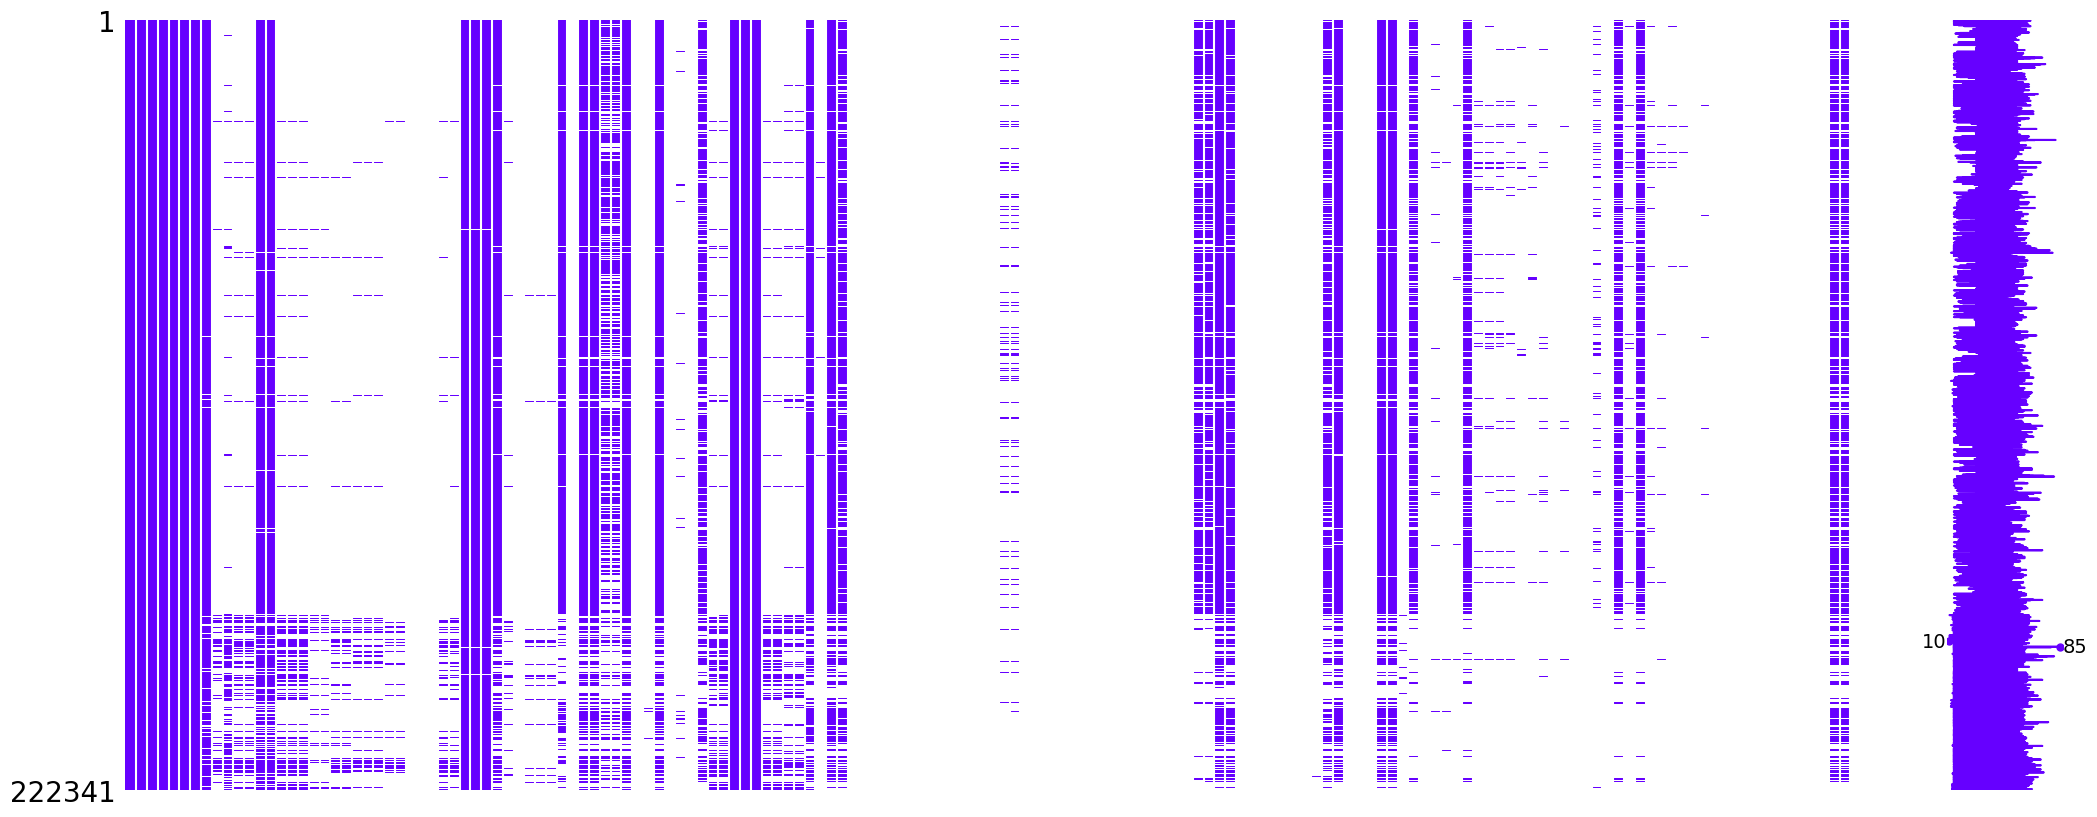

In [7]:
import missingno as msno
%matplotlib inline
msno.matrix(df_autre,color=(0.4,0,1))

In [10]:
# Création d'une fonction qui permet la représentation graphique des valeurs nulles

def graph_null(df,long):
    
   
    val_nul = pd.DataFrame(round(df.isnull().sum()/df.shape[0],3),columns=['% val_nulle'])
    val_nul = val_nul.sort_values("% val_nulle", ascending=False)

    val_nul=val_nul*100
    val_nul

    fig, ax = plt.subplots(figsize=(6, long))
    
    ax.set_xlim(0, 100)
    ax.set_xlabel( "",size=0 )
    sns.barplot(x =val_nul['% val_nulle']  , y =val_nul.index ,data = val_nul , color = 'r',orient='h')
    plt.setp(ax.get_yticklabels(),fontsize = 8)
    plt.title("% de valeur manquante par colonne")

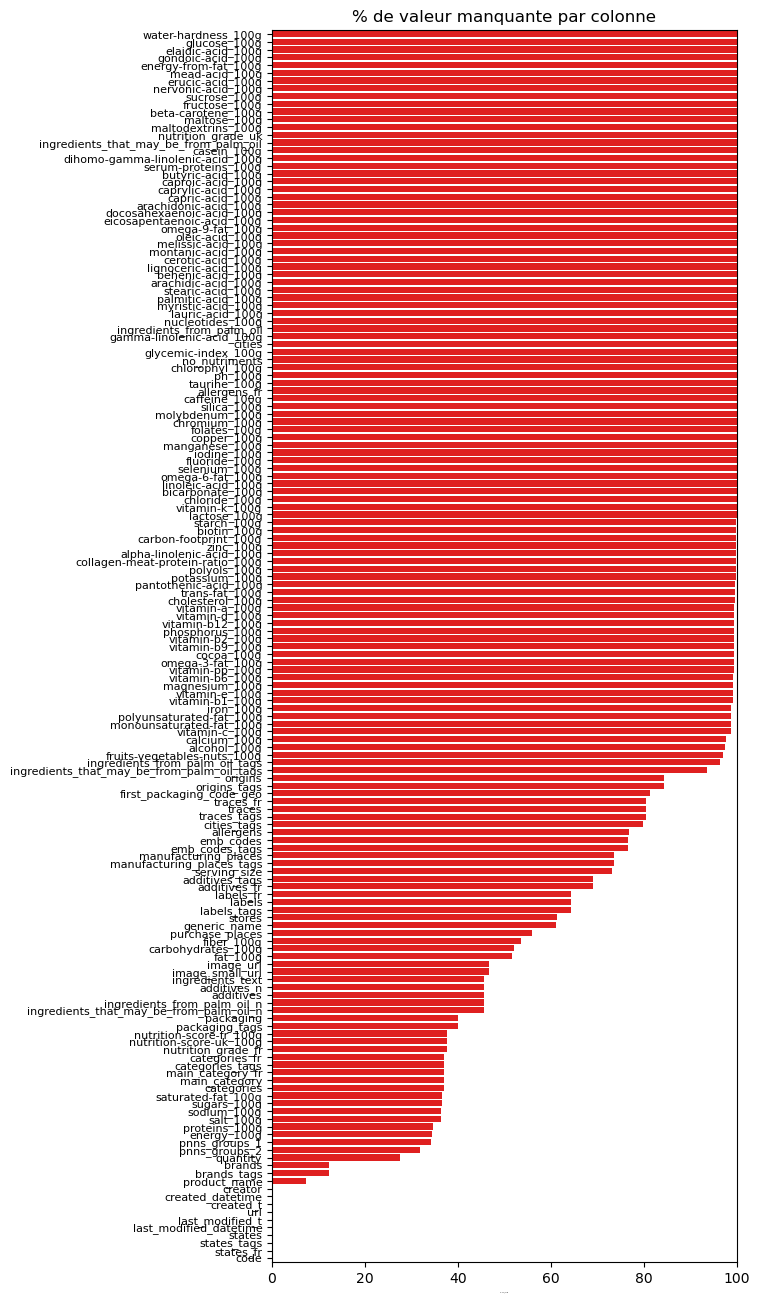

In [11]:
graph_null(df,16)

In [12]:
# Suppression des colonnes qui ont plus de 80% de valeurs manquantes

for X in list(df.columns):
    if (df[X].isnull().sum()/df.shape[0]) > 0.8 :
        df = df.drop(columns=[X])

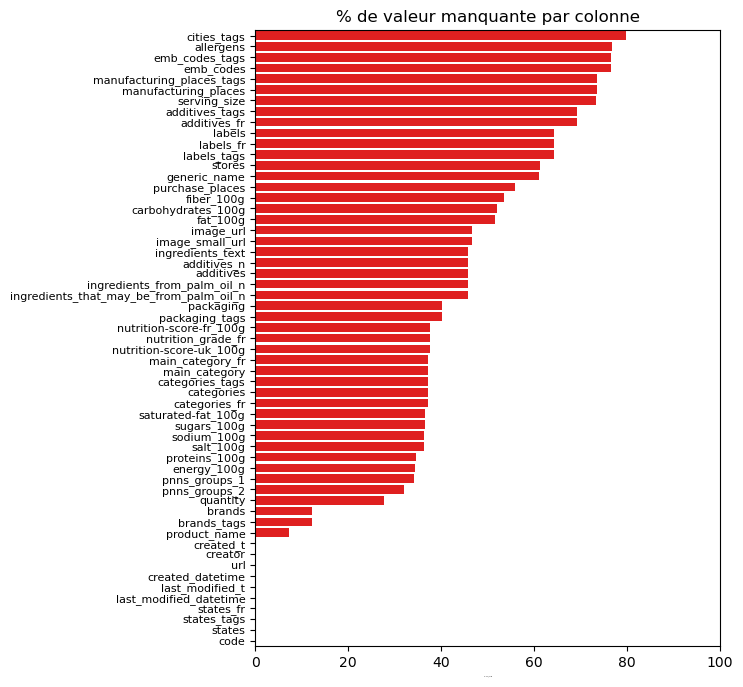

In [13]:
graph_null(df,8)

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">2. ⌛️Variables temporelles</div>   
<a class="anchor" id="Par_2"></a> 

****

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">4. Gestion des outliers (IQR & Filtres)</div>   
<a class="anchor" id="Par_4"></a> 

****

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">4.3 Traitement des variables product_name et nutri_score</div>
<a class="anchor" id="Section_4.3"></a>

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">4.4 Suppression des variables qualitatives inutiles</div>
<a class="anchor" id="Section_4.4"></a>

>Supppression des variables soient parce qu'il y a trop de données manquantes et donc inutilisable      
soient inutile pour l'étude

In [90]:
# Nous concervons uniquement les variables pour lesquelles il y a suffisement de données

df = df[["code","creator","created_t","product_name","quantity","pnns_groups_2","pnns_groups_1","energy_100g","fat_100g","nutrition_grade_fr",
    "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","nutrition-score-fr_100g","carbohydrates_100g"]]

<AxesSubplot:>

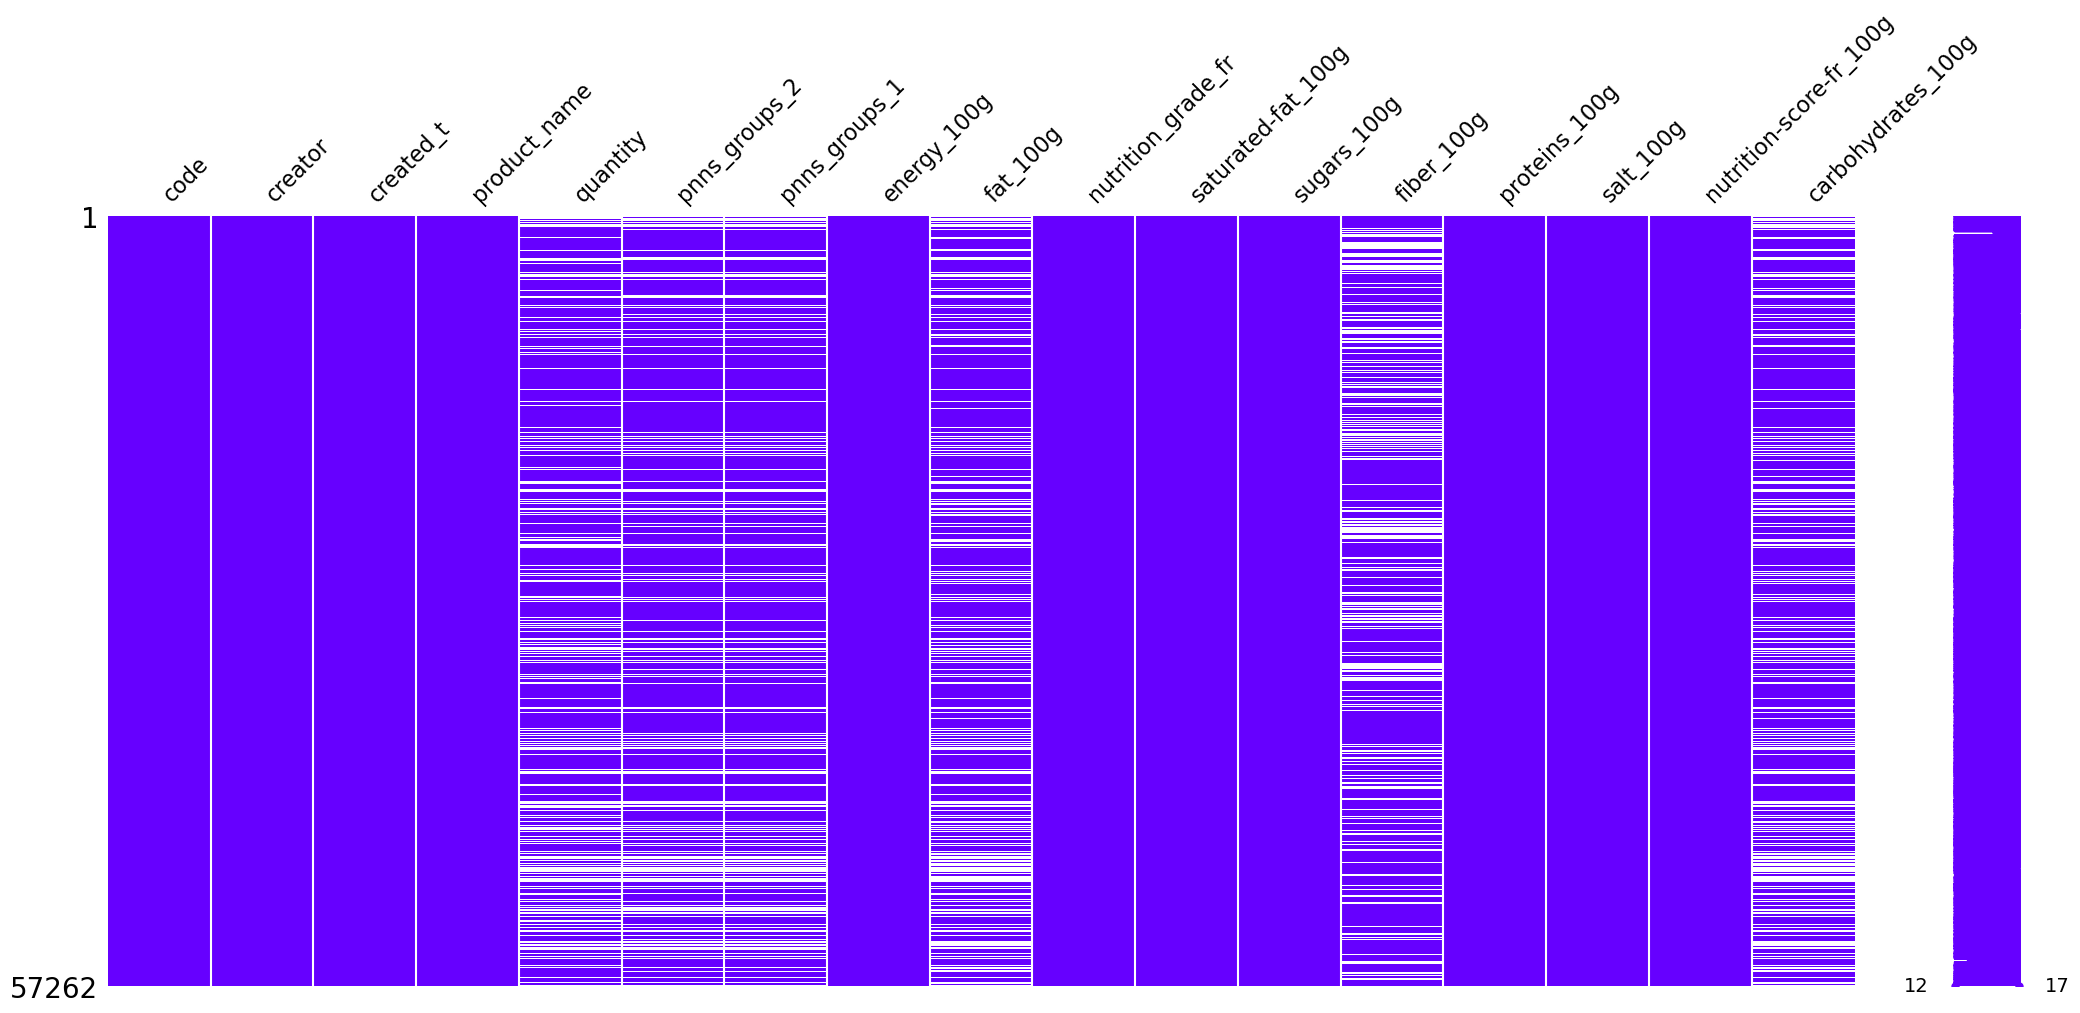

In [91]:
import missingno as msno
%matplotlib inline
msno.matrix(df,color=(0.4,0,1))

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">5. Données manquantes & imputations </div>   
<a class="anchor" id="Présentation"></a> 

****

 **Présentation des deux méthodes**

> La variable fibre n'a que 39 données manquante en commun avec la variable pnns_group_2.      
Nous utilisons la médiane de chaque groupe (pnn_groupe) et nutriscore pour renseigner les      
données manquantes.

> les variables fat_100g et carbohydrates_100g ont 30% de données manquantes en commun avec    
pnn_groups_2. Nous utiliserons la méthode du plus proche voisin, avec vérification graphique.    

> Nous vérifions que l'imputation ne modifie pas la structure des groupes du nutrigrade en     
affichant avant et après l'imputation, une boxplot de chaque groupe pour la variable en question.

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">5.1 Imputation par la median de chaque groupe</div>
<a class="anchor" id="Section_5.1"></a>

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">5.2 Imputation par la méthode des plus proches voisins (KNN)</div>
<a class="anchor" id="Présentation"></a>

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">Conclusion</div>   
<a class="anchor" id="Conclusion"></a> 

****

# 📄 References<a class="anchor" id="Références"></a> 
- [Santé Publique France](https://www.santepubliquefrance.fr/)
- [Open_fact_food](https://world.openfoodfacts.org/)
- [Téléchargement des données](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)
- [Librairie Pandas](https://pandas.pydata.org/docs/user_guide/index.html#)
- [Librairie scikit-learn](https://scikit-learn.org/stable/user_guide.html)
- [ANOVA Technique](https://www.pythonfordatascience.org/anova-python/)
- [Librairie plotly](https://plotly.com/python/))